In [1]:
from ipynb.fs.full.Functions import *

In [2]:
T, C, Q, U= get_Q_arr() #Fetching neutral T, C and Q


In [3]:
m = []
for Qloop in Q:
    m.append(np.average(Qloop))

In [4]:
print(T.size)
print(U[0].size)

1342
1342


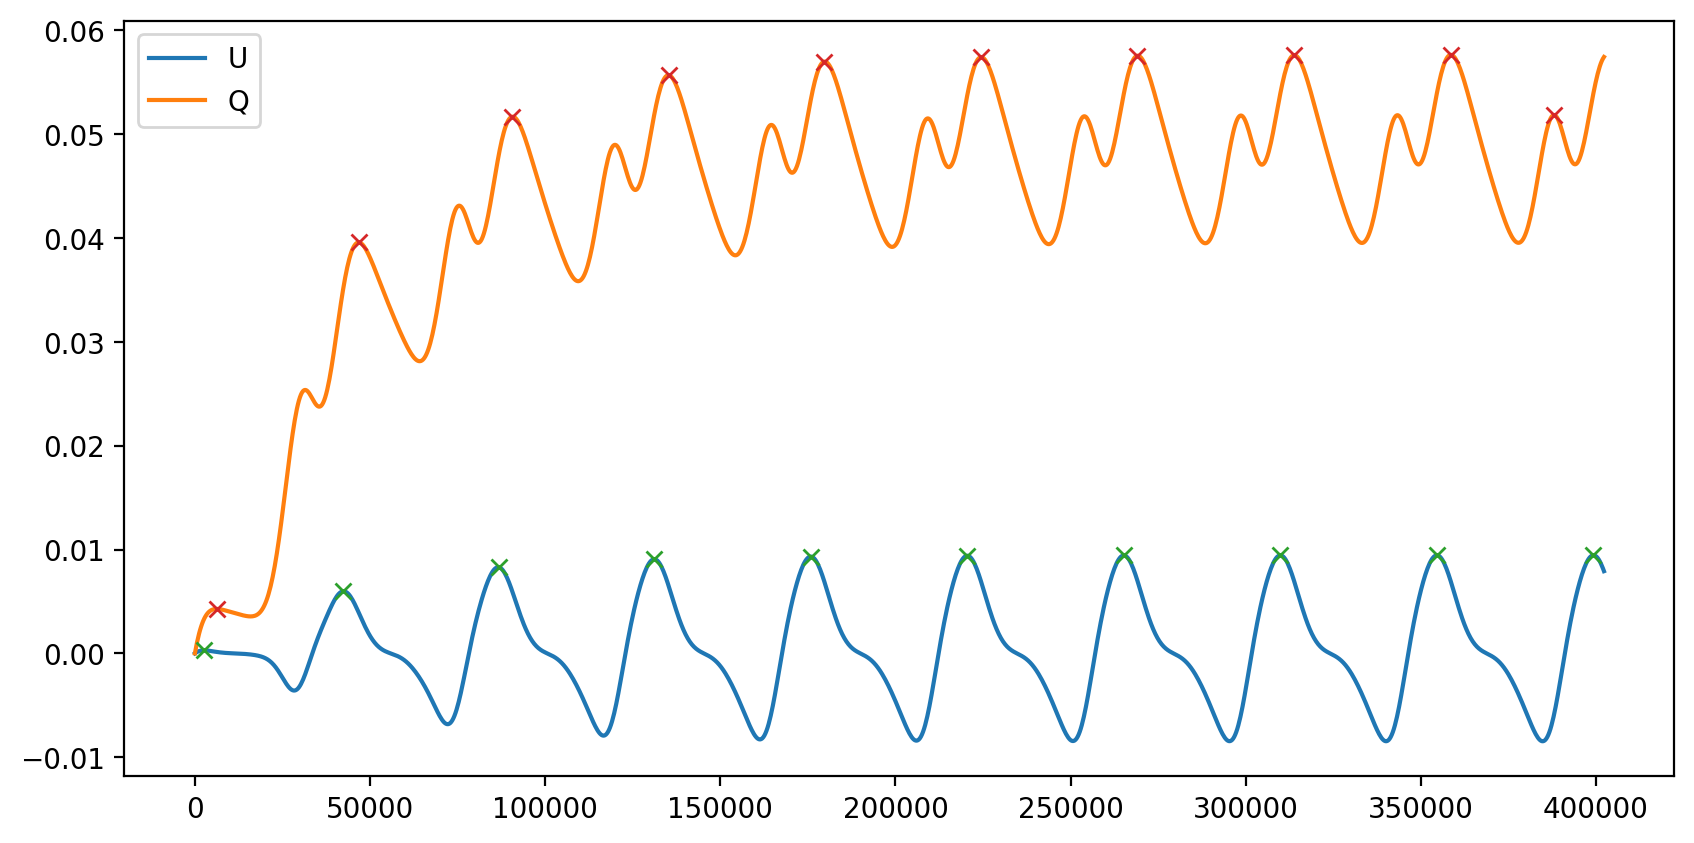

In [5]:

peaks_C,bs = find_peaks(U[0], distance = 60) #distance is set such that the small peak before big peak isn't considered
peaks_Q,bs = find_peaks(C[0], distance=60)
    
# plt.plot(T,C[0])
plt.plot(T,U[0], label="U")
plt.plot(T,C[0], label='Q')
plt.plot(T[peaks_C],U[0][peaks_C], 'x')
plt.plot(T[peaks_Q],C[0][peaks_Q], 'x')
plt.legend()


In [6]:
# scalar = np.array([1,1.05,1.12,1.25,1.5,1.75,2,2.12,2.17,2.25,2.5,3])
scalar = np.linspace(0.5,3,16)
WC,WU,KC,KU = peaksmachine(scalar_arr = scalar)

In [7]:
print(scalar)

[0.5        0.66666667 0.83333333 1.         1.16666667 1.33333333
 1.5        1.66666667 1.83333333 2.         2.16666667 2.33333333
 2.5        2.66666667 2.83333333 3.        ]


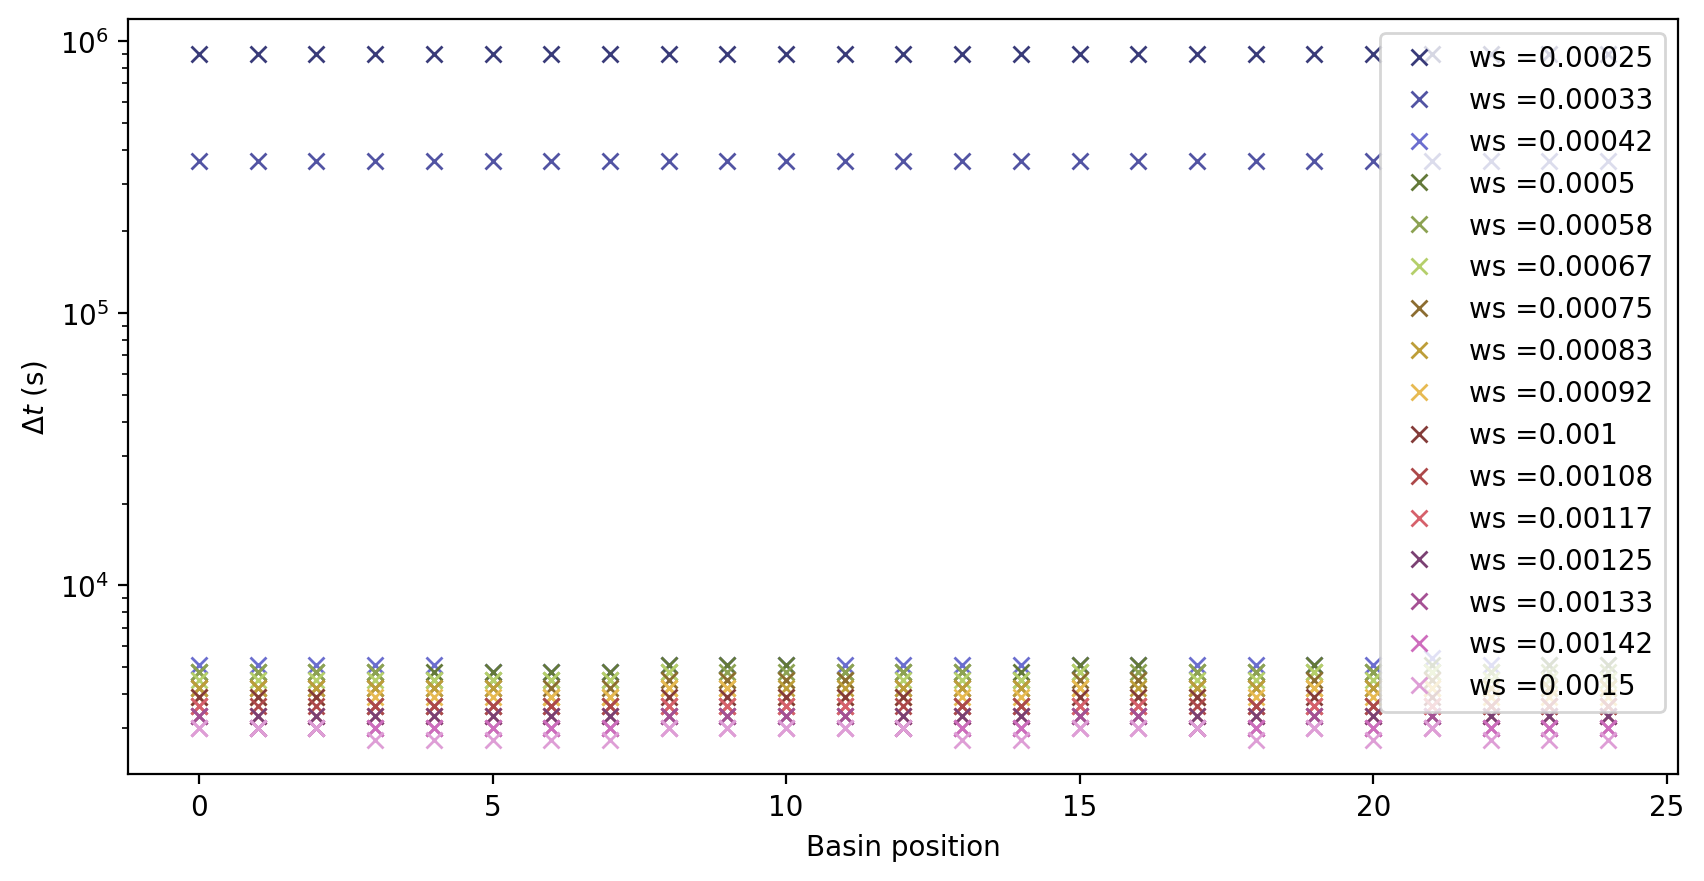

In [8]:
cmap = matplotlib.cm.get_cmap('tab20b')
rgba = cmap(0.5)
N = len(scalar) - 1
Ws = 5e-4
for i in range(len(WC['WC_0'])-1):
    if i == 0:
        for j in range(int(scalar.size)):
            if j <= int(scalar.size):
                colorfloat = j/N
                rgb = cmap(colorfloat)
                plt.plot(i,(WC[f'WT_{j}'][1] - WC[f'WT_{j}'][0]) * peaks_comparison(WC[f'WC_{j}'][i], KU['KQ_4'][i]), 'x', label=f'ws ={np.round(Ws*scalar[j],5)}',color=rgb)
        else:
            None
    else:
        for j in range(int(scalar.size)):
            colorfloat = j/N
            rgb = cmap(colorfloat)
            plt.plot(i,(WC[f'WT_{j}'][1] - WC[f'WT_{j}'][0]) * peaks_comparison(WC[f'WC_{j}'][i], KU['KQ_4'][i]), 'x',c=rgb)
        else:
            None
     
    
    
    
plt.ylabel('$\Delta t$ (s)')
plt.xlabel('Basin position')
plt.yscale('log')
plt.legend()

In [9]:

Ar2 = np.ndarray(shape=(scalar.size,len(WC['WC_0'])-1))

for i in range(len(WC['WC_0'])-1):
    for j in range(int(scalar.size)):
            if j <= (scalar.size):
                Ar2[j][i] = np.array(peaks_comparison(WC[f'WC_{j}'][i], KU['KQ_4'][i]))
    else:
        None



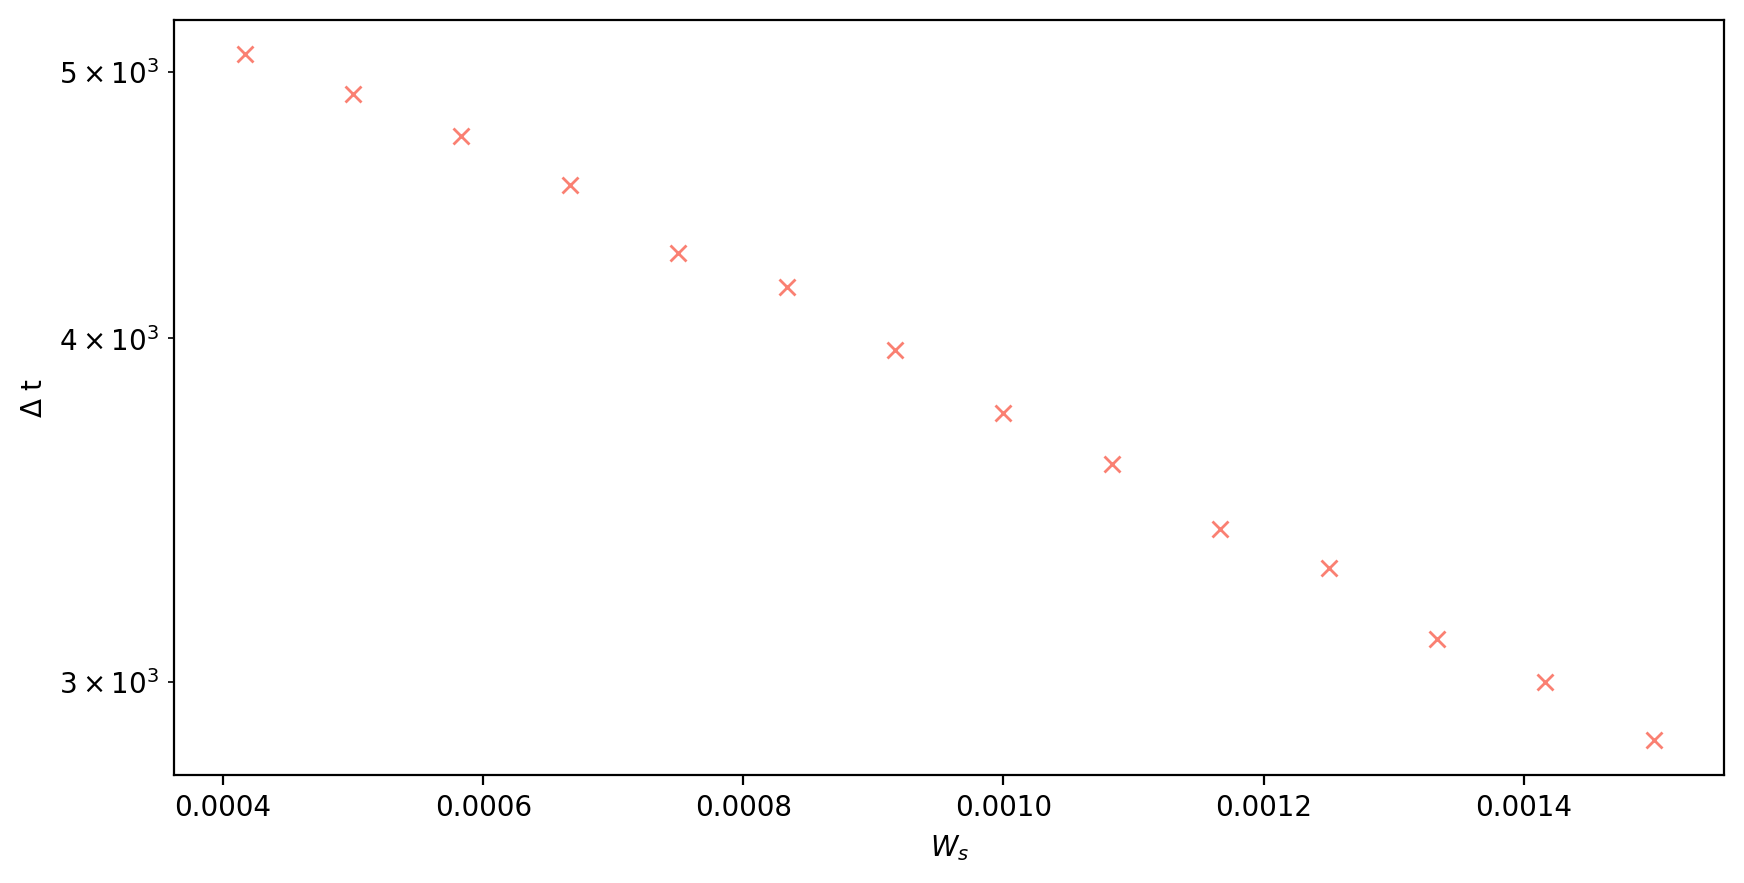

In [47]:


for i in range(len(Ar2)-2):
    colorfloat = i/len(Ar2)
    rgb = cmap(colorfloat)
    plt.plot(scalar[i+2]*Ws, np.average(Ar2[i+2]) * (WC[f'WT_{i+2}'][1] - WC[f'WT_{i+2}'][0]), 'x',c='salmon')
    
plt.xlabel('$W_s$')
plt.ylabel('$\Delta$ t')
plt.yscale('log')
# plt.xscale('log')
# plt.ylim(100,200)

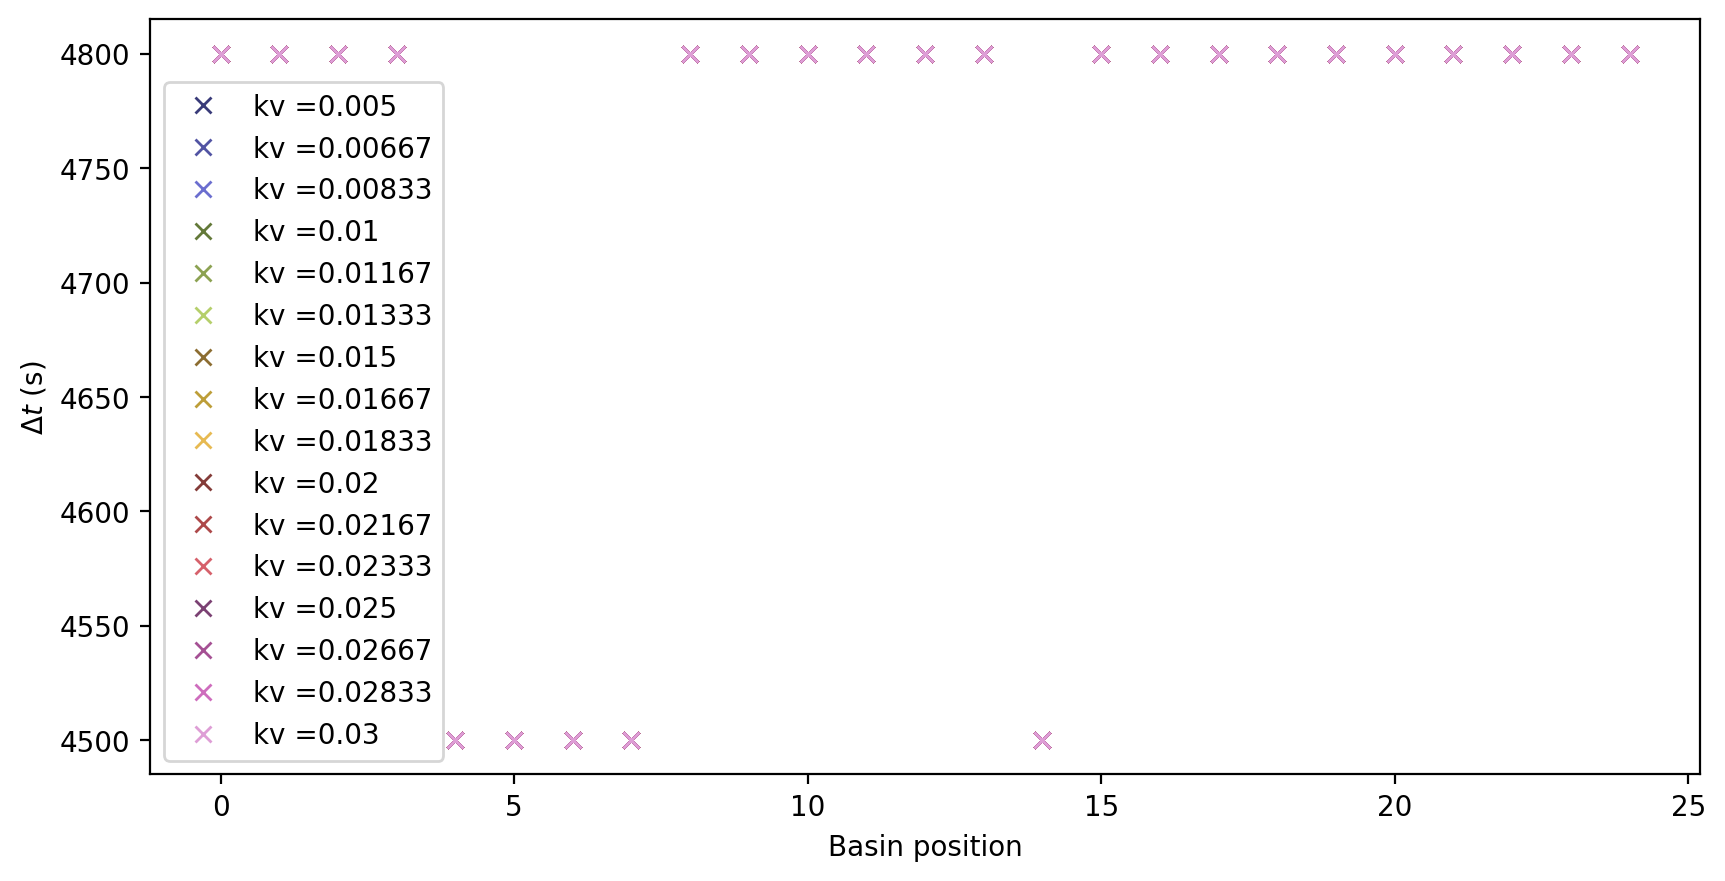

In [11]:

cmap = matplotlib.cm.get_cmap('tab20b')
rgba = cmap(0.5)
N = len(scalar) - 1

Kv = 1e-2

for i in range(len(KU['KQ_0'])-1):
    if i == 0:
        for j in range(int(scalar.size)):
            if j <= int(scalar.size):
                colorfloat = j/N
                rgb = cmap(colorfloat)
                plt.plot(i,(KC[f'KT_{j}'][1] - KC[f'KT_{j}'][0]) * peaks_comparison(WC['WC_4'][i], KU[f'KQ_{j}'][i]), 'x', label=f'kv ={np.round(Kv*scalar[j],5)}',color=rgb)
        else:
            None
    else:
        for j in range(int(scalar.size)):
            colorfloat = j/N
            rgb = cmap(colorfloat)
            plt.plot(i,(KC[f'KT_{j}'][1] - KC[f'KT_{j}'][0]) * peaks_comparison(WC['WC_4'][i], KU[f'KQ_{j}'][i]), 'x',c=rgb)
        else:
            None
     
    
    
    
plt.ylabel('$\Delta t$ (s)')
plt.xlabel('Basin position')
plt.legend()

In [39]:

KAr = np.ndarray(shape=(scalar.size,len(WC['WC_0'])-1))

for i in range(len(WC['WC_0'])-1):
    for j in range(int(scalar.size)):
            if j <= (scalar.size):
                KAr[j][i] = np.array(peaks_comparison(WC['WC_4'][i], KC[f'KC_{j}'][i]))
    else:
        None



Text(0, 0.5, '$\\Delta$ t')

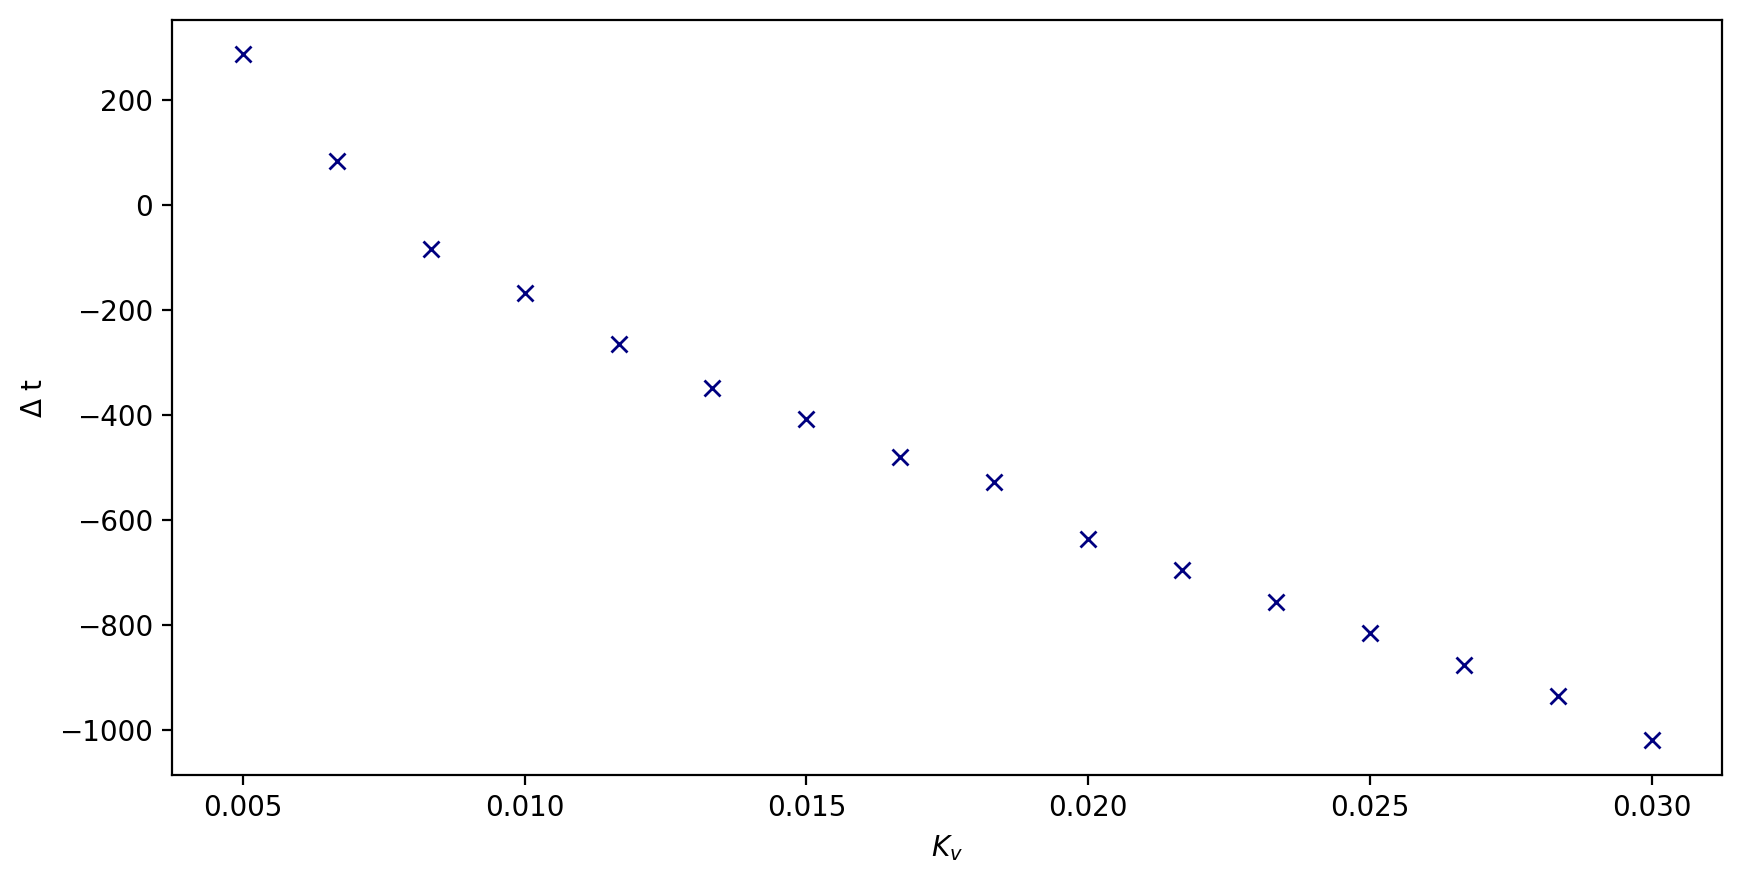

In [42]:


for i in range(len(KAr)):
    colorfloat = i/len(KAr)
    rgb = cmap(colorfloat)
    plt.plot(scalar[i]*Kv, np.average(KAr[i]) * (KC[f'KT_{i}'][1] - KC[f'KT_{i}'][0]), 'x',c='navy')
    
plt.xlabel('$K_v$')
plt.ylabel('$\Delta$ t')
# plt.yscale('log')
# plt.ylim(100,200)

## Part 2

In [25]:
KU['KQ_0']

array([[0.13780728, 0.13250293, 0.12704968, ..., 0.1478334 , 0.14292891,
        0.13780728],
       [0.13657985, 0.13130553, 0.12588578, ..., 0.14655754, 0.14167523,
        0.13657985],
       [0.13527025, 0.13002831, 0.12464462, ..., 0.14519548, 0.14033723,
        0.13527025],
       ...,
       [0.03959533, 0.03767613, 0.03577048, ..., 0.04344553, 0.04152103,
        0.03959533],
       [0.02231166, 0.02119149, 0.02008532, ..., 0.02457994, 0.02344239,
        0.02231166],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
print(KU)

{'KQ_0': array([[0.13780728, 0.13250293, 0.12704968, ..., 0.1478334 , 0.14292891,
        0.13780728],
       [0.13657985, 0.13130553, 0.12588578, ..., 0.14655754, 0.14167523,
        0.13657985],
       [0.13527025, 0.13002831, 0.12464462, ..., 0.14519548, 0.14033723,
        0.13527025],
       ...,
       [0.03959533, 0.03767613, 0.03577048, ..., 0.04344553, 0.04152103,
        0.03959533],
       [0.02231166, 0.02119149, 0.02008532, ..., 0.02457994, 0.02344239,
        0.02231166],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), 'KQ_1': array([[0.13780728, 0.13250293, 0.12704968, ..., 0.1478334 , 0.14292891,
        0.13780728],
       [0.13657985, 0.13130553, 0.12588578, ..., 0.14655754, 0.14167523,
        0.13657985],
       [0.13527025, 0.13002831, 0.12464462, ..., 0.14519548, 0.14033723,
        0.13527025],
       ...,
       [0.03959533, 0.03767613, 0.03577048, ..., 0.04344553, 0.04152103,
        0.03959533],
       [0.0223116

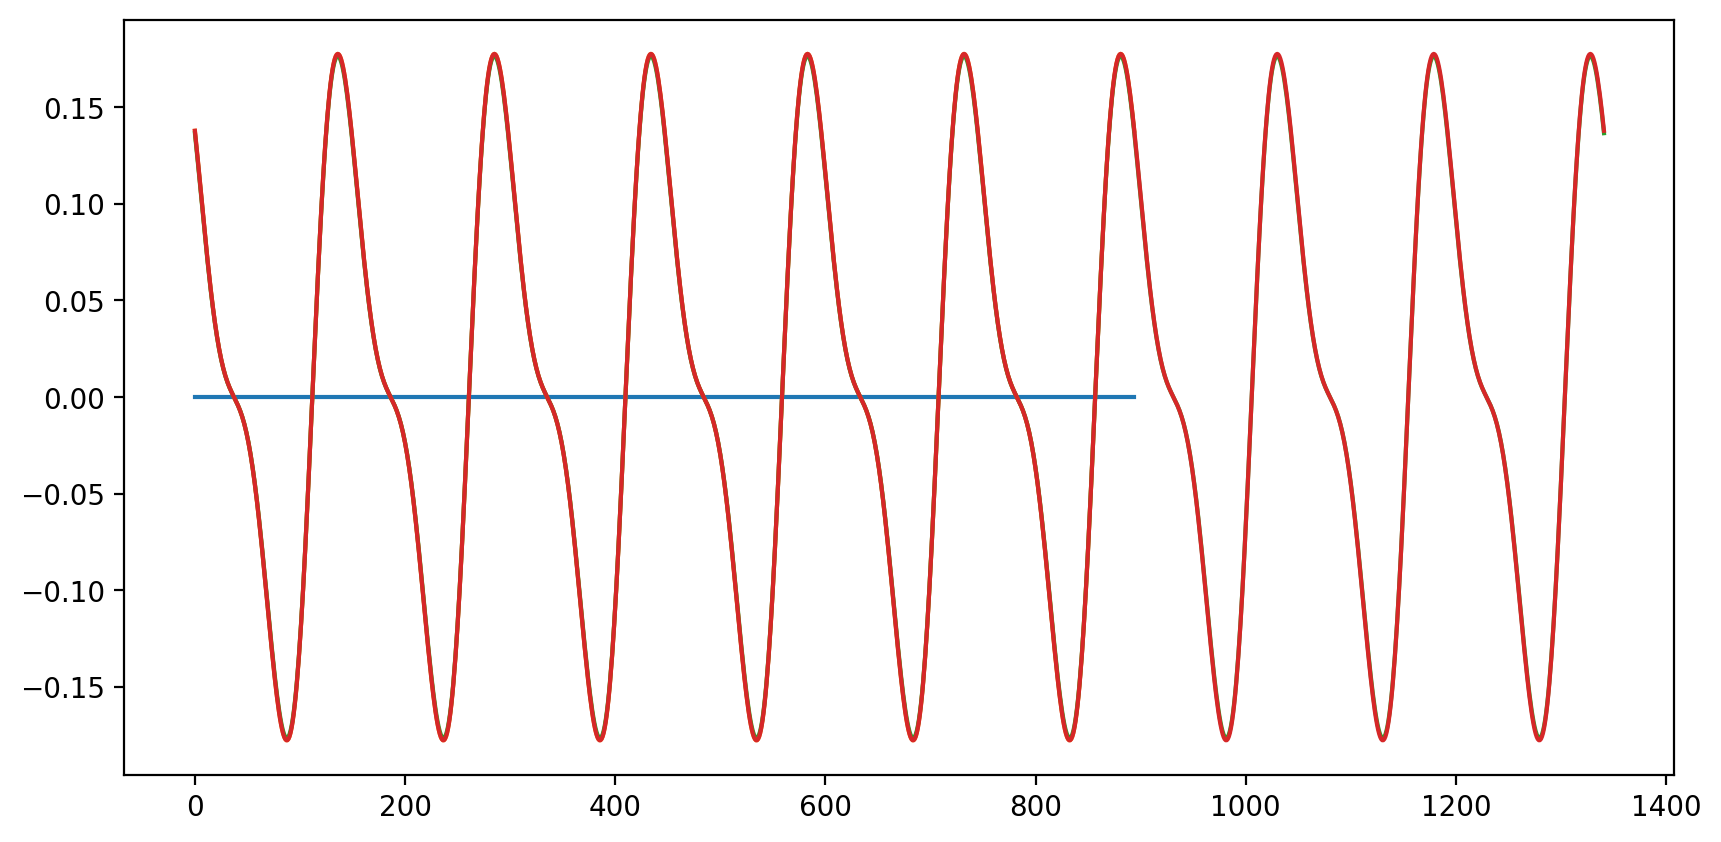

In [37]:
plt.plot(KU['KQ_0'][])
plt.plot(KU['KQ_1'][0])
plt.plot(KU['KQ_2'][1])
plt.plot(KU['KQ_3'][0])